# <u>Exploring the effect that Elon Musk's tweets have on the stock price of Tesla</u>

Authors: Trinity Lee and Sidney Taylor

## Why does this matter?
As social media has become easier to access over the years, sites like Twitter have become increasingly popular with executive figures, as they can voice their own opinions more casually, and interact with a fanbase that they have built through their companies. The most prolific and active example of this at the moment is Elon Musk. He has amassed a Twitter following of over 130 million users, at least 10% of which interact with each of his tweets. This naturally places him directly in the eye of the public and gives him an even bigger influence on society. Being the CEO and Co-Founder of Tesla, everything he says and does has the potential to create a ripple effect within the EV Giant. In particular, his activity on Twitter has been speculated to cause the stocks of his companies to be negatively affected, as investors lose confidence in Elon.

Looking at whether his tweets specifically caused this dip is interesting, as it would provide decent evidence for a claim of Musk intentionally tweeting specific things to benefit his financial position. This raises ethical and legal questions about the behavior and activity of CEOs on social media platforms. Some may argue that they should be able to say whatever they want, while others will want to protect their investments and limit the comments of CEOs on partisan and other dividing issues.

In this essay, we will use public tweet data from Twitter to attempt to come to a reasonable conclusion on the effect that Elon Musk's tweets have on the stock price of Tesla.

We hope to answer the question:
<br/>To what extent is the stock price of Tesla affected by Elon Musk's tweets and their content?

## Hypothesis
Based on a range of news stories and other compelling studies done on the subject of company optics, we can do our best to predict whether there is a direct correlation between the decrease in the stock price of Tesla and the content of Elon Musk's tweets around that time. In the past, Musk has been penalized by overseeing authorities for tweets that have cost his investors substantial losses. This suggests the fact that there is at least a small correlation that he and disciplinary bodies such as the SEC are aware of, however, the actual correlation is harder to pinpoint. This is because any direct statement that suggests Musk tweeted knowing he would affect the stock price could be treated as market manipulation, which is a much more serious accusation and requires a much more thorough investigation. For this study, we are only exploring whether the change took place due to the tweets, not whether it was intentional or not.

With the previous and ongoing cases surrounding Elon Musk's tweets, as well as the real-time stock prices of Tesla being heavily volatile for numerous reasons, it is reasonable to predict that the content of Elon Musk's tweets has a decent impact on the stock price of Tesla.

## Methodology
This exploration will be broken down into several stages. First, we will explore the `snscrape` library, and how it can be used to scrape tweet data. There are many reasons why direct API calls are risky to use with Twitter in particular, which need to be addressed for context. We will then use this library to scrape all of Elon Musk's tweets after 2017. 2018 as the starting year will be justified during this essay, but the overall argument stems from the fact that out of Musk's 23000 tweets, 20000 of them are from 2018 and beyond. He was also not as vocal about Tesla on social media before that time, so all the tweets in that time will not provide us useful data for our exploration.

After using the `snscrape` library, we will then generate some python functions to filter this data in different ways. We will then be left with data frames and processed CSVs that we can use for the next stage.

We will then look at using the `stockplot` and `yfinance` libraries to scrape the stock prices of the relevant indices. In particular, indices relating to tech companies, top 100 companies, and EV indices will be useful.

We will then determine a threshold for what constitutes a significant drop in stock price, and generate a list of dates of interest.

To validate this list, we will conduct an event study for one of the key dates, and train and implement a SARIMA model to prove that without the tweet happening, the stock activity would have remained stable.

We will then look at the content of the tweets across some of the key filtered dates, and see if there is any correlation between the content of Musk's tweets and the drastic change in Tesla's stock price.

## Making sense of snscrape

Run the following cells to make sure that you are using the latest versions of the functions and that all the required libraries are imported.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from twitscrape import *
import snscrape.modules.twitter as sntwitter

To adequately test the different parts of snscrape, you also need to have the library installed and updated to its latest version. This is because updates to the formatting of the Twitter site can happen at any time, and the library is constantly being updated to reflect these format changes.

You can install snscrape by running the following command in a conda environment:
<br/> `pip install snscrape`

Make sure it is updated by running the following command:
<br/> `pip install --upgrade snscrape`

## Why snscrape?
Over the recent years, Twitter API has gotten a lot worse. Most features have been paywalled, and the ones that are available are heavily rate limited so that the servers don't get overloaded with network traffic. While this is a good thing in theory for stability, it is not ideal for people who want to scrape tweets from the site and make comments on any potential correlations. Using snscrape is a good way to harvest data without directly calling from the API. The only issue is that there is zero official documentation on how to use it in a python wrapper environment, as it was intended to be used in a shell environment. The following sections will detail the discovery process that we went through in order to learn about the different modules that snscrape has, and will go through how to scrape tweets and other metadata from a profile, using helper functions.

Note: This library was created by the user "JustAnotherArchivist" on GitHub, and the repository is linked [here](https://github.com/JustAnotherArchivist/snscrape).

## Looking at different modules

Some modules include:
* TwitterProfileScraper
* TwitterTweetScraper
* TwitterUserScraper
* TwitterTrendsScraper

For the purposes of our exploration, we want to look at TwitterUserScraper, as it doesnt include other people mentioning the user that we are requesting the search for. 

You can look at all the contents that it gets from the most recent tweet in a profile, and from that we can grab all of the useful data we need and manipulate it however we want.

Below is a cell that will grab the data of the latest tweet from NAME's twitter profile, try it if you want and see all the info we can use.

In [4]:
NAME = "jack" #paste the twitter handle here without the '@'
user_scraper = sntwitter.TwitterUserScraper(NAME).get_items()
for tweet in user_scraper:
    break
tweet

Tweet(url='https://twitter.com/jack/status/1620552043609096192', date=datetime.datetime(2023, 1, 31, 22, 38, 10, tzinfo=datetime.timezone.utc), rawContent='and Google Play Store: https://t.co/1Ve7GIBG0F\n\nand of course, the open web: https://t.co/qXl9xrmtKE (one of many)', renderedContent='and Google Play Store: play.google.com/store/apps/det…\n\nand of course, the open web: snort.social (one of many)', id=1620552043609096192, user=User(username='jack', id=12, displayname='jack', rawDescription='#bitcoin\n#nostr: npub1sg6plzptd64u62a878hep2kev88swjh3tw00gjsfl8f237lmu63q0uf63m', renderedDescription='#bitcoin\n#nostr: npub1sg6plzptd64u62a878hep2kev88swjh3tw00gjsfl8f237lmu63q0uf63m', descriptionLinks=None, verified=True, created=datetime.datetime(2006, 3, 21, 20, 50, 14, tzinfo=datetime.timezone.utc), followersCount=6544847, friendsCount=4620, statusesCount=29016, favouritesCount=35948, listedCount=33484, mediaCount=2904, location='', protected=False, link=TextLink(text='snort.social/p/n

As you can see, various metadata is captured by the generator and stored in different modules. For example, `date` gives you the date and time that the tweet happened, retweetCount and likeCount give you the number of retweets and likes that a tweet has gotten respectively. We can call these values individually by calling the iterable variable, in this case `tweet`, followed with a dot and the field that we want to look at.

`tweet.displayname` returns the display name of the twitter user, while `tweet.followersCount` tells you the amount of followers that the user had at the time of tweeting.

## Pulling specific data from a tweet

In `twitscrape.py`, there is a function called `get_tweet` which returns the content of a tweet using the rawContent module.

Feel free to test grabbing the content of a tweet from any account using the code cell below.

If the tweet is an image, a shortened hyperlink to the tweet will be the output.

In [ ]:
NAME = "jack"
tweet = get_tweet(NAME)
print(tweet)

You can call multiple elements from the scraper generator at once, and print their values in a list to see a the content of a tweet, as well as its key metadata.

The `get_tweet_data` function does this and returns the date, tweet, likes and retweets for the latest tweet on a specified profile.

In [ ]:
NAME = "jack"
tweet_data = get_tweet_data(NAME)
print(tweet_data)

The date is in a weird format, however, if we were to print this extrated date separately, it would look normal. This is because the date is being stored as a datetime object. Date time objects store each piece of information about the date and time as separate integers, and they are converted and output based on a specified output format. These objects can be used to call different parts of the object such as the date only, if you want to compare them to a different date and time. This is an approach we can take to compare the day of a tweet to the day of a stock price. Use [this](https://www.listendata.com/2019/07/how-to-use-datetime-in-python.html#id-886a0d) link to learn more about datetime objects.

For this part of the exploration, it is best to convert the datetime object into a string, which can then be broken down into aspects for date and time manually. Later in the exploration we will work with datetime objects directly, but since this data will be exported to a csv and implicitly converted to a string anyways, working with strings is easier in this case. The `datetime` class has a function which can do this, and below you can see its implementation.

(For simplicity, a `get_tweet_date` function was defined that gets the date of the latest tweet from a profile.)

In [ ]:
NAME = "jack"
dates = get_tweet_date(NAME)
print(dates)
date = dates.strftime("%d-%m-%Y")
time = dates.strftime("%H:%M:%S")
date_type=type(date)
time_type=type(time)
print(f"The date of this tweet is {date} and it is a {date_type}.")
print(f"The time of this tweet is {time} and it is a {time_type}.")

## Scraping tweets within a certain timeframe.
Using the basis of the previous functions, the elements can be combined to scrape a profile for a certain number of tweets. It can then later be customized to allow for the number of tweets scraped to be determined, as well as all the tweets tweeted in a certain month. The function `get_thou_tweets` starts by taking the twitter handle as an input, and stores the list of the last 1000 tweets in a csv called `"NAME-1000.csv"` in the `raw-data` folder, where name is the display name of the twitter profile. The data is stored as a pandas dataframe, with the rows representing the date, time, content, and view count of the tweet respectively. The dataframe is then returned for further analysis and plotting.

In [ ]:
NAME = "jack"

last_thou_tweets = get_thou_tweets(NAME)

Running the above cell meant that the scraper had to be iterated with 1000 times. While this specific function doesn't take too long, it can become very time consuming if tens of thousands of tweets are iterated through. While this time is difficult to cut down due to the nature of the scraper collecting the data, keeping the file size down is imperative.

One way we did this was by considering looking at all tweets in a specific month, and perhaps using this data to determine tweet activity per month.
<br/>The function `get_tweets_in_month` scans the same 10000 tweet period, but this time only tweets within a specifed month are saved to the csv. This data is viewable from the `raw-data` folder.

Note: This function differs to the previous ones in a few ways. The `statusesCount` (total tweets) value needs to be grabbed freom an object within the `user` object, so that the loop can be broken out of if the loop index surpasses it. The position of the loop conditions changes, and the additional object call takes place at the start of the for loop.

In [ ]:
NAME = "jack"
MONTH = "Feb"
tweets = get_tweets_in_month(NAME,MONTH)

This function has to scrape through the entire tweet list of a user, which in some cases can be very large. This is unfortunately unavoidable. To prevent this time-heavy task from being repeated multiple times, we decided that the best approach would be to do the large initial data scrape with snscrape and save the output to a csv, and then programatically filter it down by reading into a variable and iterating through the list. This second stage is almost instant, no matter the size of the data, and means we can filter down the raw data as many times as needed without a concievable time penalty.

## Generating raw data

Now we have an understanding of all the different aspects of the scraping library and we have determined different ways to filter the tweets you are interested in.

Because of the fact that the majority of Elon Musk's tweets were after 2017, and Tesla as a project began to rapidly grow around 2018, it makes sense to  only scrape the tweets that took place in 2018 and beyond. However, this is still a significant number of tweets (20000) and will take a long time to run. Since Elon Musk has 23000 tweets in total, for completeness we will be scraping through all tweets.

The function `get_all_tweets` scrapes through a user's entire profile for all tweets, and stores the data in a csv. The output is in the `raw-data` folder.

Note: This __will__ take an extremely long time to run.

In [4]:
NAME = "elonmusk"
tweets = get_all_tweets(NAME)

## Manipulating the scraped tweets

For this section, run the cell below to import the tweet filtering functions.

In [5]:
from csv_process import *

With all this data stored in a csv, it can then be filtered down further based on specific dates, and we can chooose to omit other data if needed.

The easiest way to start this is by writing all the data in the csv to a variable that can be manipulated.

The function `read_to_variable` takes the name of the scraped data we are looking for and returns a list of all the tweet data.

Note: The files are stored with the name format: `*name*-all-tweets.csv`. If you are looking for the file that has all of Elon Musk's tweets, the calling function would be:
`read_to_variable("elonmusk")`.

In [15]:
NAME = "elonmusk"
tweets = read_to_variable(NAME)

With all the data in rows, it can then be iterated through to only include tweets that meet specific criteria. That way there is a much smaller dataset to work with. For example, if you only want tweets tweeted on a certain date to be in the list, this can be done.

The function `show_tweets_on` takes a list of tweets and a target date as the input, and returns the tweets that were tweeted on that date.

This function also removes replies made by the account, as they branch of into separate conversations, and are not in the scope of this exploration.

Note: The date should be in the format `mm-dd-yyyy`

In [20]:
DATE = "02-14-2020"
specific_tweets_on_date = show_tweets_on(tweets,DATE)
print(specific_tweets_on_date)

[['2020-02-14 17:56:07+00:00', 'Only the heart senses beauty', '']]


In some cases, the tweets we want to examine might not have taken place on the exact date that the stock price dropped. Because of this, it can be sensible to look at all tweets tweeted within a specific time period. The function `get_tweets_around` takes a name and the number of days before and after a given date to look for tweets for.<br/>Note: The date should be in the format `mm-dd-yyyy`<br/>This function omits replies, by checking if the first character of the tweet is an `"@"` symbol.

In [21]:
DATE = "2021-12-12"
RANGE = 3
specific_tweets_around_date = get_tweets_around(tweets,DATE,RANGE)
print(specific_tweets_around_date)

[['2021-12-14 10:34:23+00:00', 'Tesla will make some merch buyable with Doge &amp; see how it goes', ''], ['2021-12-13 22:21:51+00:00', 'Will also be important for Mars', ''], ['2021-12-13 22:21:34+00:00', 'SpaceX is starting a program to take CO2 out of atmosphere &amp; turn it into rocket fuel. Please join if interested.', ''], ['2021-12-12 12:47:36+00:00', 'https://t.co/5LE1PjFwgS', ''], ['2021-12-12 12:29:34+00:00', 'Sine qua non non https://t.co/iTBlSwiX53', ''], ['2021-12-12 12:27:32+00:00', 'Sorry https://t.co/ppBPBAWxZ6', ''], ['2021-12-12 03:44:29+00:00', 'Just did a @HardcoreHistory episode with Dan Carlin. Hope you like it.', ''], ['2021-12-11 20:12:56+00:00', '“No better friend, no worse enemy” https://t.co/e2TeRBiFbg', ''], ['2021-12-10 17:52:37+00:00', 'Mars &amp; Cars', ''], ['2021-12-10 17:29:40+00:00', 'Wow, only three weeks to 2022! \nWhat will 2032 will be like? \nSeems so futuristic!\nWill we be on Mars?', ''], ['2021-12-10 17:19:13+00:00', 'Hahaha … ?1', ''], ['202

## Writing the data to a csv

Once we have all the data we need, we can write it into a pandas dataframe and store it as a csv. The dataframe is returned so that we can use the tweet content and dates in our event studies later.

The function `write_to_csv` takes processed data and the intended filename as inputs, and writes the data to a csv in the `processed-data` folder with that specific name. It also returns the dataframe.

In [22]:
FILENAME = f"{NAME}-tweets-around-{DATE}.csv"

tweets_df = write_to_csv(specific_tweets_around_date,FILENAME)

## Stock Price Web Scraping

After grabbing all the twitter data, the next step to answering our question is web scraping stock data of Tesla and other companies. 


This is made easy by the existence of a library called `yfinance`, an open-source library that uses Yahoo's publicly available APIs to access the information from Yahoo! finance. Specifically, we'll be web scraping the **closing prices** of a stock on a given day. From here on out any time "raw stock data" is referenced, we mean the unchanged value of the closing prices of a stock, without normalization or any other modifications. 

The first thing we can do is set the range of dates we want to scrape. We *could* choose when Tesla first IPOs to current date (Approx. 2010), but there is a more targeted approach to deciding the range of dates to reduce time complexity. It was only in 2013 that Tesla had its first profitable quarter, meaning that from it's IPO date to 2013, it's stock prices would be more affected by it's status as an high risk startup investment that wasn't making profits and this tweets. Furthermore, given that his account became verified by Twitter only in 2012, it's safe to assume 2010-2013 were years where Tesla's stock prices and Musk's tweets did not have high correlation. Hence, choosing to start from 2014 to the present date would be the best range of dates we want to scrape from. 

In [6]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from stock_plot import StockPlot
import pandas as pd
import numpy as np

import pmdarima as pm


start_date = "2014-01-01"
end_date = "2023-2-28"

## Comparing Stocks 

First we need to choose the different stocks/indexes we will be looking at. Of course, we will be web scraping Tesla's stocks, but because we need to analyze when Tesla's stocks behave abnormally compared to the rest of the market, we need a control group. 

We decided that the Nasdaq 100, S&P 500, and a EV ETF called DRIV would be the control group that we reference when checking whether Tesla’s drop was following the overall market trend. The S&P 500 Index tracks the performance of the top 500 largest companies on the stock exchange in the US. We assume in our data analysis that the S&P 
500 would thus represent most accurately the broad stock market behavior. Hence, we can compare Tesla's behavior to the overall market through referencing the S&P 500. The Nasdaq 100 Index is a basket of the 100 largest, most actively traded U.S companies listed on the Nasdaq stock exchange. A large portion of the index covers the technology sector, which accounts for 56% of the index's weight. We chose the Nasdaq for several reasons. First, as an index it is a good reflection to the overall stock market’s performance, and due to its high concentration of technology companies, it specifically reflects the high-tech industry which is where Tesla is in. Hence, anytime the entire high-tech market is impacted, we will be able to find out through the Nasdaq and thus be able to identify times when only Elon Musk’s companies’ stocks drop. 

### Companies/EV specific

We also want to compare Tesla to rival competitors in the similar sector or more specific comparisons. However,electric vehicles (EV) have only become popular in the recent years. In fact, 2013 was when Tesla made its first quarterly profit, and it took until 2021 for the company to have its first profitable year. With these statistics in mind, EVs are still relatively recent, and thus not a lot of data is available on Tesla's direct competitors with the IPO dates being in only in the last several years. 

We can then want to look at Tesla in the context of the Overall EV market. The Global X Autonomous & Electric Vehicles ETF (DRIV) includes companies involved in the development of autonomous vehicle software and hardware, as well as companies that produce EVs, EV components such as lithium batteries, and critical EV materials such as lithium and cobalt. This is ETF would be a better reference than an individual EV competitor, such as Rivian, which lacks data. 



To organize and abstract many of the tasks that will need to be done for this section of web scraping and data analysis, we developed a StockPlot class with attributes and methods which allow us perform the same action on multiple sets of data. 




### A Brief Overview of the StockPlot Class

Below is a short overview of the different attributes & methods. Some of these will be explained later in the essay, but for a more in depth look, please refer to the docstrings in `stock_plot.py`.

Attributes:
1. **ticker symbol**: The shorthand name for a stock. For example, Tesla's ticker symbol is **TSLA**. We save this symbol for graphing purposes and for specifying in yfinance's function which stock data to pull. 
2. **start & end dates**: Just the start and end dates of our range of data we web scrapped. 
3. **stock data**: This is the raw closing price stock data of each date in our range. It's important to note that Wall Street is only open on weekdays, meaning that there will be date skips for our stock data. This will come into play later.

Methods:
1. **Getter methods**: StockPlot has a getter method for getting the raw stock data and the ticker value
2. **Creating Percent Variance**: A method which returns the percent variance of the stock per day in a pandas series. This will be expounded upon later
3. **Creating Normalized stock prices**: A method which returns the normalized versions of the stock prices in pandas series form. This allows us to compare the behavior of stocks with vastly different prices. 
4. **Creating a subrange of stock prices**: A method which returns a subset of stock data with specified ranges.

## Plotting Basic Time Series
Next, for each company/index stock, we create an StockPlot object for them and put then in a list. This allows our data to be organized. We then plot the graphs. 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NameError: name 'ax' is not defined

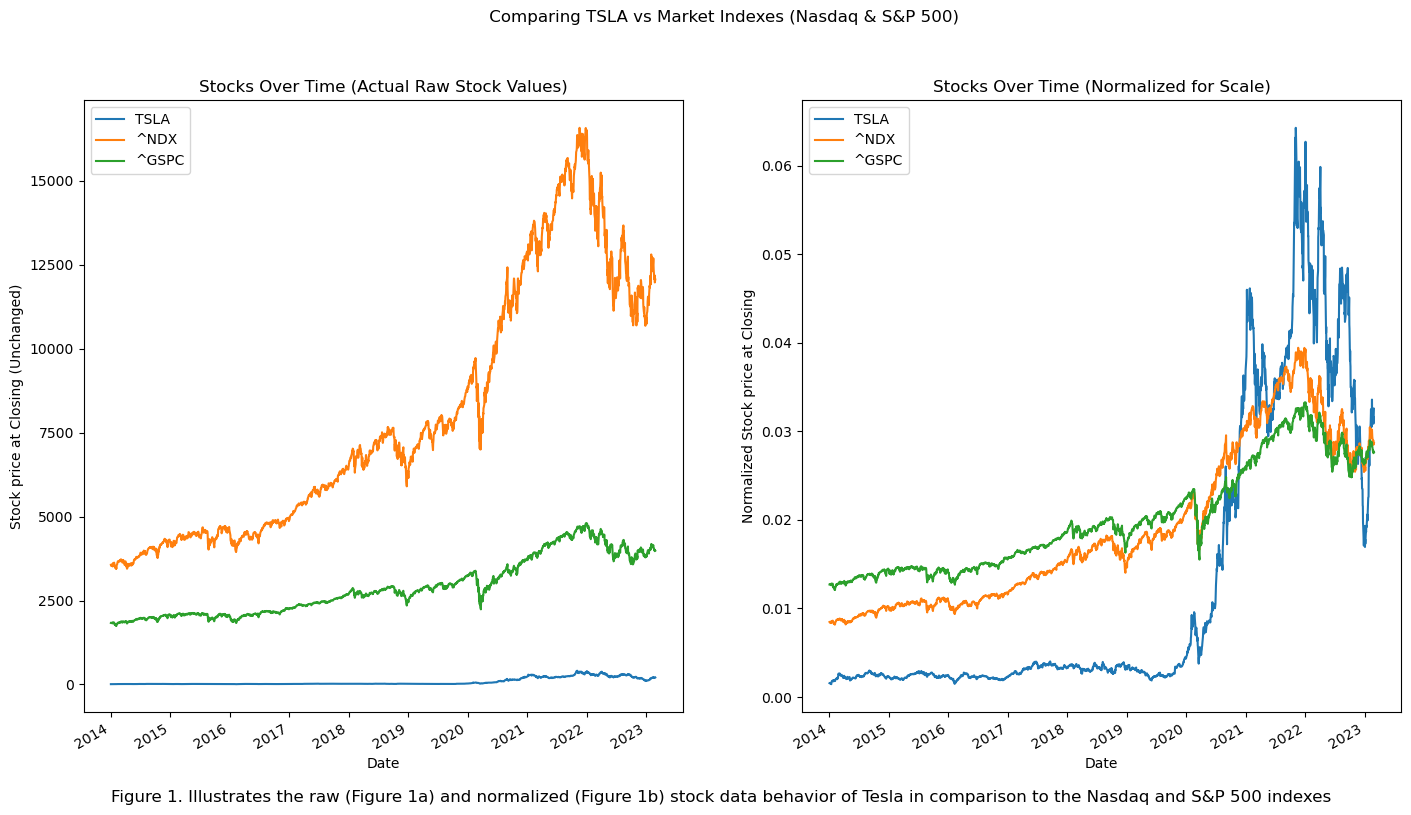

In [7]:
import string

# Creating StockPlot Objects
tesla = StockPlot("TSLA", start_date, end_date)
nasdaq = StockPlot("^NDX", start_date, end_date)
sp500 = StockPlot("^GSPC", start_date, end_date)
ev_etf = StockPlot("DRIV", start_date, end_date)


#Storage for organization & easy plotting
market_list = [tesla, nasdaq,sp500]
ev_list = [tesla, ev_etf]
all_list = [tesla, nasdaq, sp500, ev_etf]

#Settings for the graph dimensions

#SubPlot 1: Raw Closing Stock Prices
fig, axes = plt.subplots(2, 1, figsize=(17,9))
fig.suptitle(' Comparing TSLA vs Market Indexes (Nasdaq & S&P 500)')

plt.subplot(1, 2, 1)
for symbol in market_list:
    symbol.get_stock_data().plot(label=symbol.get_ticker())
    
plt.ylabel("Stock price at Closing (Unchanged)")
plt.title("Stocks Over Time (Actual Raw Stock Values)")
plt.legend()

#SubPlot 2: Normalized Closing Stock Prices
plt.subplot(1, 2, 2)
for symbol in market_list:
    symbol.get_normalized_data().plot(label=symbol.get_ticker())

plt.ylabel("Normalized Stock price at Closing")
plt.title("Stocks Over Time (Normalized for Scale)")
plt.legend()

#Subplot & Captioning
caption="Figure 1. Illustrates the raw (Figure 1a) and normalized (Figure 1b) stock data behavior of Tesla in comparison to the Nasdaq and S&P 500 indexes"
plt.figtext(0.5, 0.1, caption, wrap=True, horizontalalignment='center', fontsize=12)

plt.text(-0.1, 2, "(a)", transform=ax.transAxes, size=20)
plt.text(0.45, 2, "(b)", transform=ax.transAxes, size=20)

plt.show()


#Plotting Tesla vs EV ETF
fig, axes = plt.subplots(2, 1, figsize=(17,9))
fig.suptitle("Comparing TSLA with an EV ETF (DRIV)")
plt.subplot(1, 2, 1)
for symbol in ev_list:
    symbol.get_stock_data().plot(label=symbol.get_ticker())
    
plt.ylabel("Stock price at Closing (Unchanged)")
plt.title("Stocks Over Time (Actual Raw Stock Values)")
plt.legend()

#SubPlot 2: Normalized Closing Stock Prices

plt.subplot(1, 2, 2)
for symbol in ev_list:
    symbol.get_normalized_data().plot(label=symbol.get_ticker())

plt.ylabel("Normalized Stock price at Closing")
plt.title("Stocks Over Time (Normalized for Scale)")
plt.legend()

#Subplot & Captioning
caption="Figure 2. Illustrates the raw (Figure 2a) and normalized (Figure 2b) stock data behavior of Tesla in comparison to an EV ETF called DRIV"
plt.figtext(0.5, 0.1, caption, wrap=True, horizontalalignment='center', fontsize=12)

plt.text(-0.1, 2, "(a)", transform=ax.transAxes, size=20)
plt.text(0.45, 2, "(b)", transform=ax.transAxes, size=20)

plt.show()




You notice quickly that plotting the Indexes vs the Tesla stocks on one graph is not useful because the Nasdaq and S&P500 indexes' prices are so much larger than Tesla's stock. To compare the behavior, we can scale the prices through normalization via get_normalized_data() method which uses the `sci kit` library's built-in normalization function to reduce all the values to between 0-1 while preserving the overall behavior/weight of each closing price on that given day. 

You can also notice that the EV ETF we compare Tesla to only has data starting around 2017~2018 because that is when it IPOed. 

From these graphs, we can get a good idea of the stock behavior and check for stationary in our data. Based on the fact that all the data that we're working with has a clear trend (the stock price average changes over time) this means that all our data is **not stationary**. The term 'stationary' in data refers to the fact that observations are not dependent on time, and that the statistical properties (mean, variance, and covariance), are constant. In our graphs, we can see that the mean value of the stock changes over time.

Another way we can prove that our data is not stationary is by using the Augmented Dickey-Fuller Test. A quick explanation is that this is a unit root test that checks whether the data is not stationary using the p-value of our data. If the p-value is smaller than a set significance level (~0.05), then the series is stationary because it means that the coefficient of the first lag (alpha) is equal to one, or α=1.



In [32]:
adf_test = pm.arima.stationarity.ADFTest(alpha=0.05)
res = adf_test.should_diff(tesla.get_stock_data())
conclusion = "non-stationary" if res[0] > 0.05 else "stationary"
print(f"Our p-value is {res[0]} which means that our data is {conclusion}")

Our p-value is 0.47149887277043756 which means that our data is non-stationary


Now that we've proved that our data is non-stationary, further decisions can be made on how to analyze the stock data. Because the data is non-stationary, it means that we can't use the raw or normalized data to forecast future stock prices, nor identify all the instances where Tesla's stock behavior is abnormal relative to the rest of the market. We want to identify every instance where Tesla's stock price was negatively affected by Elon Musk's tweets. However, not all stock drops will be correlated with Elon’s tweets. For example, the entire stock market could drop due to extenuating circumstances (I.e war, Fed reserve meeting, etc), so Tesla’s stock dropping would not be caused by anything that Elon did specifically. So, we want to be able to filter out times when the entire stock market drops, irrespective of Elon’s tweets.  

To do this we need to identify the dates for when the entire stock market dips and filter these days out from the list of days that Tesla's stock market dips. Because our data is non-stationary, to do this, we need to take the percent variance of all the stocks. Percent variance is the rate of change between days in a percentage of the previous point. For example, if the stock was 100 on the first day and then 80 on the second, the percentage variance of the second day is -20% from the first day. This way we do not need to factor in the sheer difference in scale of all the stock values nor it's non-stationary nature.


NameError: name 'ax' is not defined

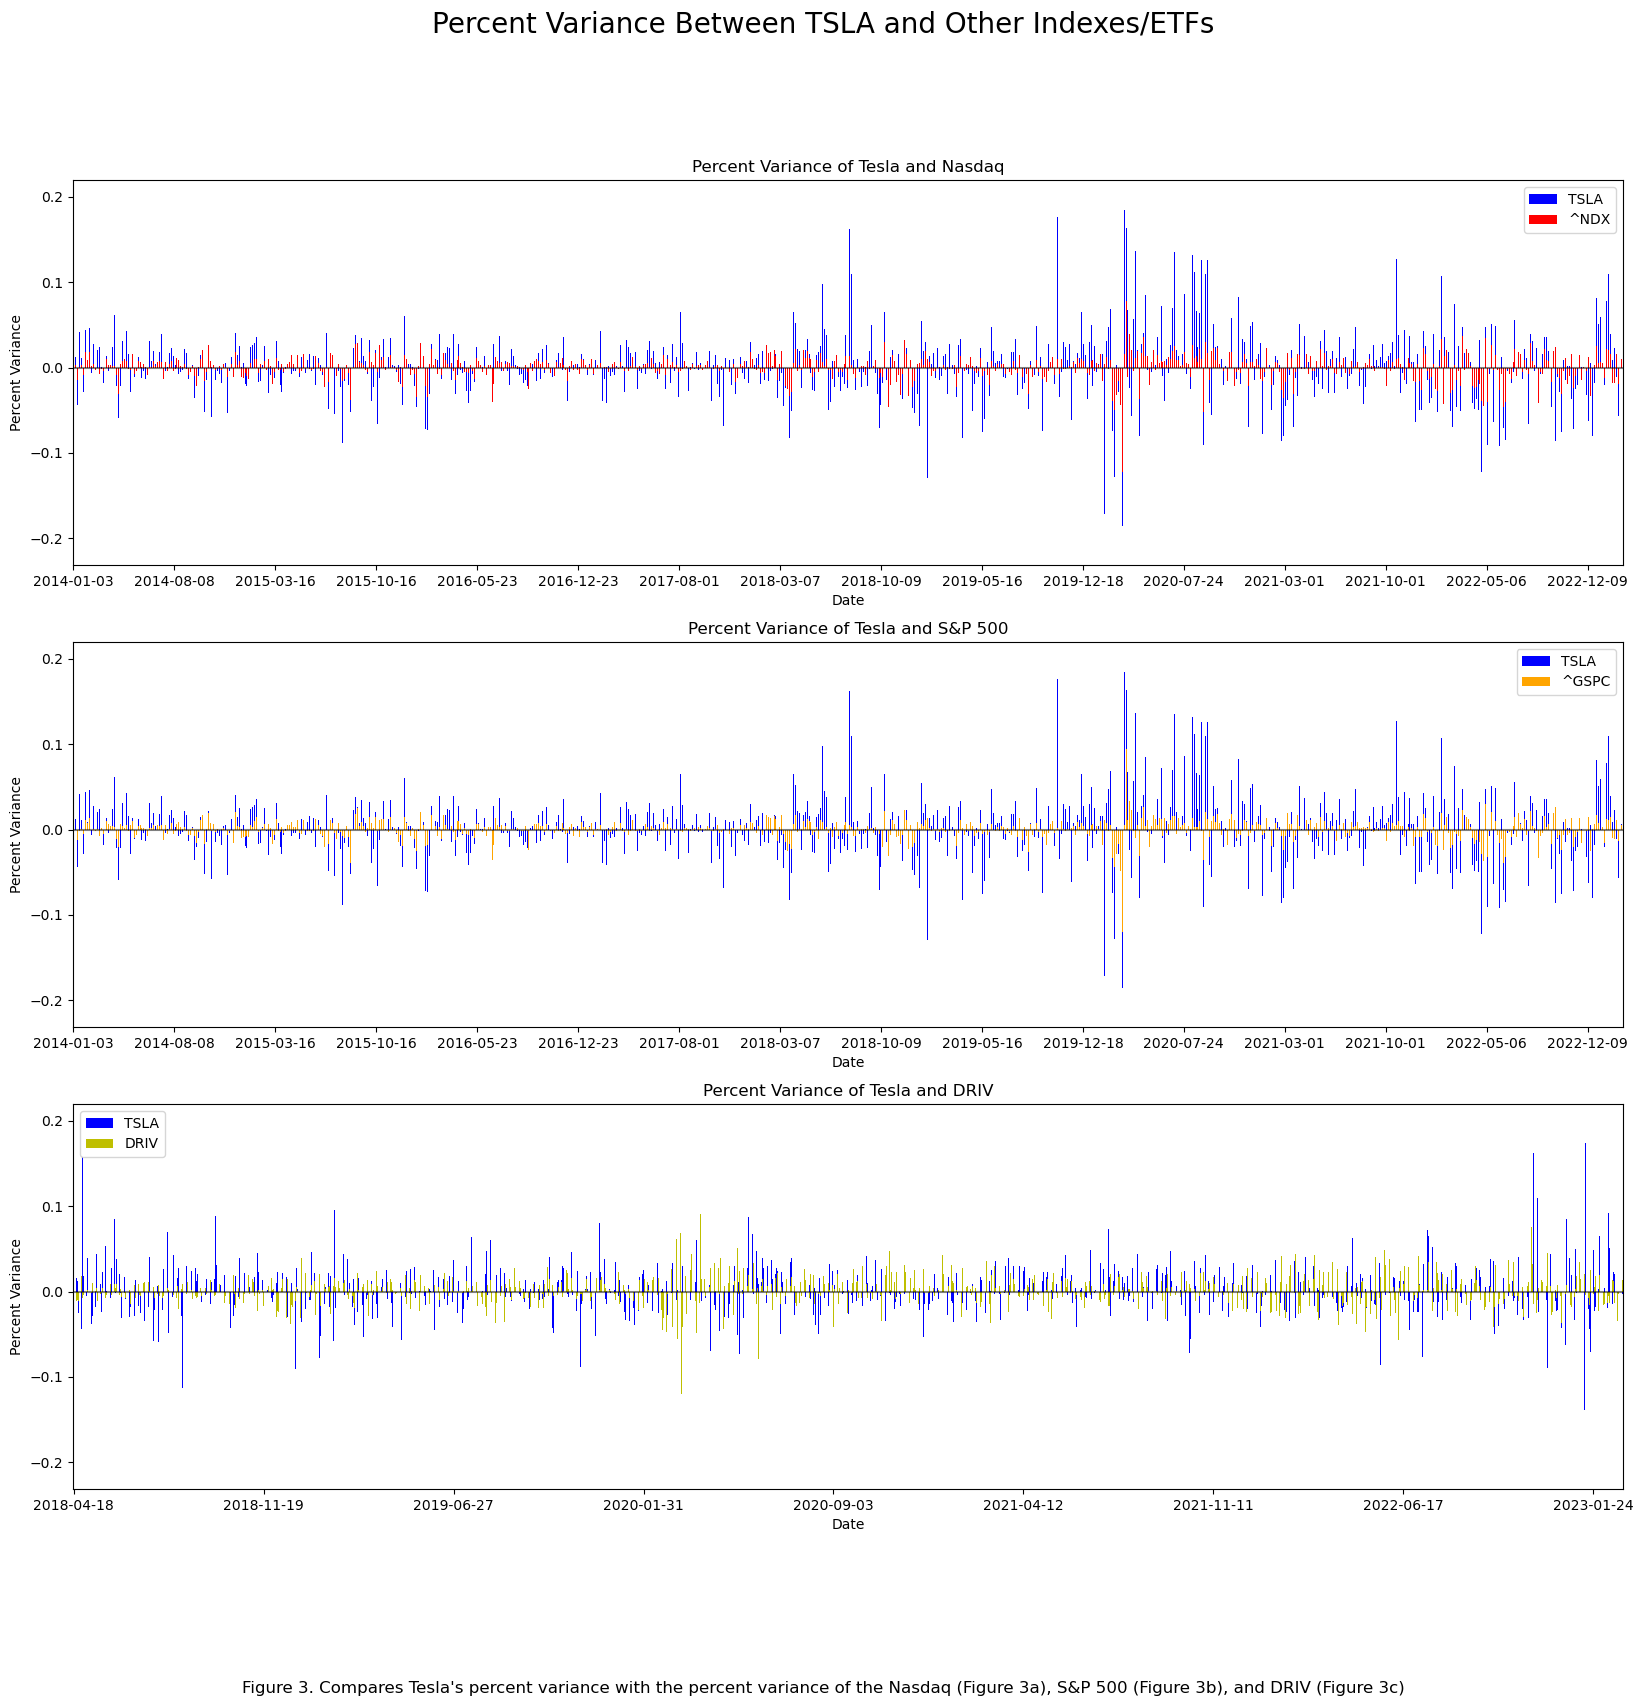

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(20,17))
locs, labels = plt.xticks()


fig.suptitle("Percent Variance Between TSLA and Other Indexes/ETFs", fontsize= 20)

#TSLA vs Nasdaq
plt.subplot(3, 1, 1)
tesla.get_variance_data().plot.bar(label=tesla.get_ticker(), color = 'b')
nasdaq.get_variance_data().plot.bar(label=nasdaq.get_ticker(), color = 'r')
plt.axhline(y = 0, color = 'black', linestyle = '-', alpha=0.5)

plt.xticks(rotation=0)
plt.legend()
plt.ylabel("Percent Variance")
plt.title("Percent Variance of Tesla and Nasdaq")
locs, labels = plt.xticks()
N = 150
new_labels = [labels[::N][i].get_text()[0:10] for i in range(len(labels[::N]))]
plt.xticks(locs[::N], new_labels)

#TSLA vs S&P500
plt.subplot(3, 1, 2)
tesla.get_variance_data().plot.bar(label=tesla.get_ticker(), color = 'b')
sp500.get_variance_data().plot.bar(label=sp500.get_ticker(), color = 'orange')
plt.axhline(y = 0, color = 'black', linestyle = '-', alpha=0.5)

plt.xticks(rotation=0)
plt.legend()
plt.ylabel("Percent Variance")
plt.title("Percent Variance of Tesla and S&P 500")
locs, labels = plt.xticks()
N = 150
new_labels = [labels[::N][i].get_text()[0:10] for i in range(len(labels[::N]))]
plt.xticks(locs[::N], new_labels)


#TSLA vs DRIV
plt.subplot(3, 1, 3)
tesla.get_variance_data().plot.bar(label=tesla.get_ticker(), color = 'b')
ev_etf.get_variance_data().plot.bar(label=ev_etf.get_ticker(), color = 'y')
plt.axhline(y = 0, color = 'black', linestyle = '-', alpha=0.5)

plt.xticks(rotation=0)
plt.legend()
plt.ylabel("Percent Variance")
plt.title("Percent Variance of Tesla and DRIV")
locs, labels = plt.xticks()
N = 150
new_labels = [labels[::N][i].get_text()[0:10] for i in range(len(labels[::N]))]
plt.xticks(locs[::N], new_labels)


caption="Figure 3. Compares Tesla's percent variance with the percent variance of the Nasdaq (Figure 3a), S&P 500 (Figure 3b), and DRIV (Figure 3c)"
plt.figtext(0.5, -0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)

plt.text(-0.1, 4.4, "(a)", transform=ax.transAxes, size=20)
plt.text(-0.1, 2.9, "(b)", transform=ax.transAxes, size=20)
plt.text(-0.1, 1.5, "(c)", transform=ax.transAxes, size=20)



plt.show()






Since we know that Tesla is a lot more volatile compared to the other stocks, it isn't surprising that Tesla has more extreme percentage variance. We can also note that in Figure 3c, which compares Tesla and the EV ETF, starts at 2018 because that is when the ETF IPOed. However, now we can visually see that on some dates, Tesla's percent variance moves inversely compared to the rest of the market. Here is one example of a zoomed in visual comparing Tesla with the Nasdaq for an arbitrary range of dates. There are multiple instances where Tesla's either increased or decreased inversely to the Nasdaq's prices. 

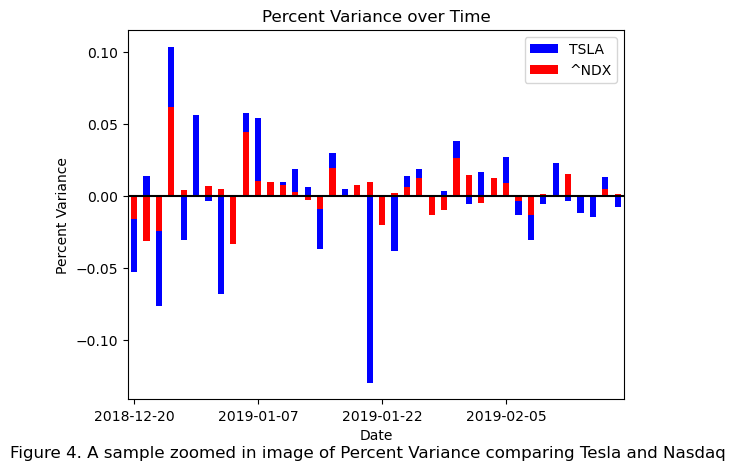

In [82]:
start_range =1250
end_range = start_range + 40
tesla.get_variance_data()[start_range: end_range].plot.bar(label=tesla.get_ticker(), color = 'b')
nasdaq.get_variance_data()[start_range: end_range].plot.bar(label=nasdaq.get_ticker(), color = 'r')

plt.xticks(rotation=0)
plt.legend()
plt.ylabel("Percent Variance")
plt.title("Percent Variance over Time")
locs, labels = plt.xticks()
N = 10
new_labels = [labels[::N][i].get_text()[0:10] for i in range(len(labels[::N]))]
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.xticks(locs[::N], new_labels)


caption="Figure 4. A sample zoomed in image of Percent Variance comparing Tesla and Nasdaq"
plt.figtext(0.5, -0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()



### Filtering Process

All this stock analysis and plotting so far has been building up to what we want to do, which is filter out when the Tesla's stock behavior in an anomalous manner compared to the rest of the market so that we can find a list of dates that could possibly be affect by Elon Musk's tweets. Specifically, we'd want to see when the stocks go down. The most straightforward method to filtering would be a set threshold for anomaly detection by using the percent variance of the different stocks. Whenever Tesla's percent variance for the day is decreasing (at least -2%) while the rest of the market is either stable or increasing, we want to flag and record that date as a date of interest for later event study investigation. However, this is still too broad a filtering method. To make it even more manageable, we can target our data analysis by only looking at the top 3 years which had the most flagged dates. This can be justified by the fact that the historical data shows that several years, such as 2014-2016, are less significant in volatility and twitter activity compared to the more recent years. 

In [46]:
var_data = [stock.get_variance_data() for stock in all_list]
raw_data = [stock.get_stock_data() for stock in all_list]

name_list = [stock.get_ticker() for stock in all_list]

merged_frame = pd.concat(var_data, axis=1)
combined_varframe = merged_frame.set_axis(name_list, axis=1)

filtered_dates_before =[]
filtered_dates =[]

#The Date before (Only for graphing usage)
for i in range(1, len(combined_varframe)):
	row = combined_varframe[i:i+1]

	if round(row['TSLA'].values[0], 2) < -0.02 and all([round(row[str(stock.get_ticker())].values[0],2)>=0 for stock in market_list[1:]]):
		filtered_dates_before.append(str(combined_varframe[i-1:i].index[0])[0:10])

#The actual final dates when the percent variance is
for index, row in combined_varframe.iterrows():

    if round(row['TSLA'], 2) < -0.02 and all([round(row[str(stock.get_ticker())],2)>=0 for stock in market_list[1:]]):
        filtered_dates.append(str(index)[0:10])

ranked_years ={"2014":0, "2015":0, "2016":0, "2017":0, "2018":0, "2019":0, "2020":0, "2021":0, "2022":0, "2023":0}
for date in filtered_dates:
    year = date[0:4]
    ranked_years[year] +=1

print(ranked_years)

{'2014': 13, '2015': 12, '2016': 12, '2017': 17, '2018': 19, '2019': 18, '2020': 15, '2021': 18, '2022': 11, '2023': 0}


From this, we can see that the top 3 years that Tesla's stocks were the most volatile (without relation to the overall market) was 2018, 2019, and 2021. For scalability, we can then just focus on all the flagged dates from these 3 years. Thus, our final list of flagged dates we need to investigate is:

In [83]:
final_dates =[]
final_dates_before=[]
final_years = ["2018", "2019", "2021"]
for date in filtered_dates:
    for year in final_years:
        if date[0:4] == year:
            final_dates.append(date)

for date in filtered_dates_before:
    for year in final_years:
        if date[0:4] == year:
            final_dates_before.append(date)
            
#print(final_dates)  #Uncomment to see all the final_dates from 218, 2019, and 2021

We can then rank the dates from highest percent variance decrease through a dictionary. From Python 3.7 and above, dictionaries are order-preserving, allowing us to use the sorted() function. We then print out the top 20 dates with the highest percent variance decrease. 



In [81]:
ranked_dates ={}
for date in final_dates:
    ranked_dates.update({date: round(tesla.get_variance_data()[date], 3)})

ranked = {k: v for k, v in sorted(ranked_dates.items(), key=lambda item: item[1])}


#This is the final list of the top percent variance decreases dates in order.
ranked_dates_only = list(ranked)[0:20]

for key in ranked_dates_only:
    print(f"Date: {key} Percent Variance {ranked[key]}")

Date: 2018-09-28 Percent Variance -0.139
Date: 2019-01-18 Percent Variance -0.13
Date: 2018-08-17 Percent Variance -0.089
Date: 2019-04-04 Percent Variance -0.082
Date: 2019-03-01 Percent Variance -0.078
Date: 2019-01-02 Percent Variance -0.068
Date: 2018-09-07 Percent Variance -0.063
Date: 2019-11-22 Percent Variance -0.061
Date: 2019-05-22 Percent Variance -0.06
Date: 2018-05-03 Percent Variance -0.055
Date: 2021-02-10 Percent Variance -0.053
Date: 2019-03-15 Percent Variance -0.05
Date: 2019-04-26 Percent Variance -0.05
Date: 2018-06-19 Percent Variance -0.049
Date: 2018-08-09 Percent Variance -0.048
Date: 2021-11-08 Percent Variance -0.048
Date: 2021-04-27 Percent Variance -0.045
Date: 2021-03-16 Percent Variance -0.044
Date: 2019-04-25 Percent Variance -0.043
Date: 2021-08-16 Percent Variance -0.043


## Date Investigation (Event Study Pre-lude)

It starts to become clear as we begin to research happened happened relating to Tesla's stocks on those dates that not all of the dates that our filter found are connected to Elon Musk's tweets. For example, on Jan 18, 2019, one of the dates that our filter picked up, Tesla cut it's workforce by 7%.

However, it becomes clear that once we start to compare all the tweets he said on some of the flagged dates, some of the tweets which he said clearly influenced his stock prices. 

One of the clearest cases of this on Nov. 6th, 2021. On Saturday (Nov. 6th, 2021), Elon Musk made a Twitter poll saying: "Much is made lately of unrealized gains being a means of tax avoidance, so I propose selling 10% of my Tesla stock." and asked users to vote yes or no on whether he should sell his stocks. When the market opened on Monday (Nov. 8th, 2021), the stock tumbled, making Tesla lose $60 billion of its market value.


## Some TWITTER DATA justifications ___________________________________________________

## Nov. 6th 2021 Event Study

From our data, one of the clearest cases of this on Nov. 6th, 2021. 

On Saturday (Nov. 6th, 2021), Elon Musk made a Twitter poll saying: "Much is made lately of unrealized gains being a means of tax avoidance, so I propose selling 10% of my Tesla stock." and asked users to vote yes or no on whether he should sell his stocks. When the market re-opened on Monday (Nov. 8th, 2021), the stock tumbled, making Tesla lose $60 billion of its market value. Here is a visual breakdown of that time. 


Flagged date is: 2021-11-08
Tesla Percent Variance: -4.84007095338631%
Nasdaq Percent Variance: -0.14272918376039165%
S&P 500 Percent Variance: 0.08877879113035328%
DRIV Percent Variance: 1.0383886613467765%


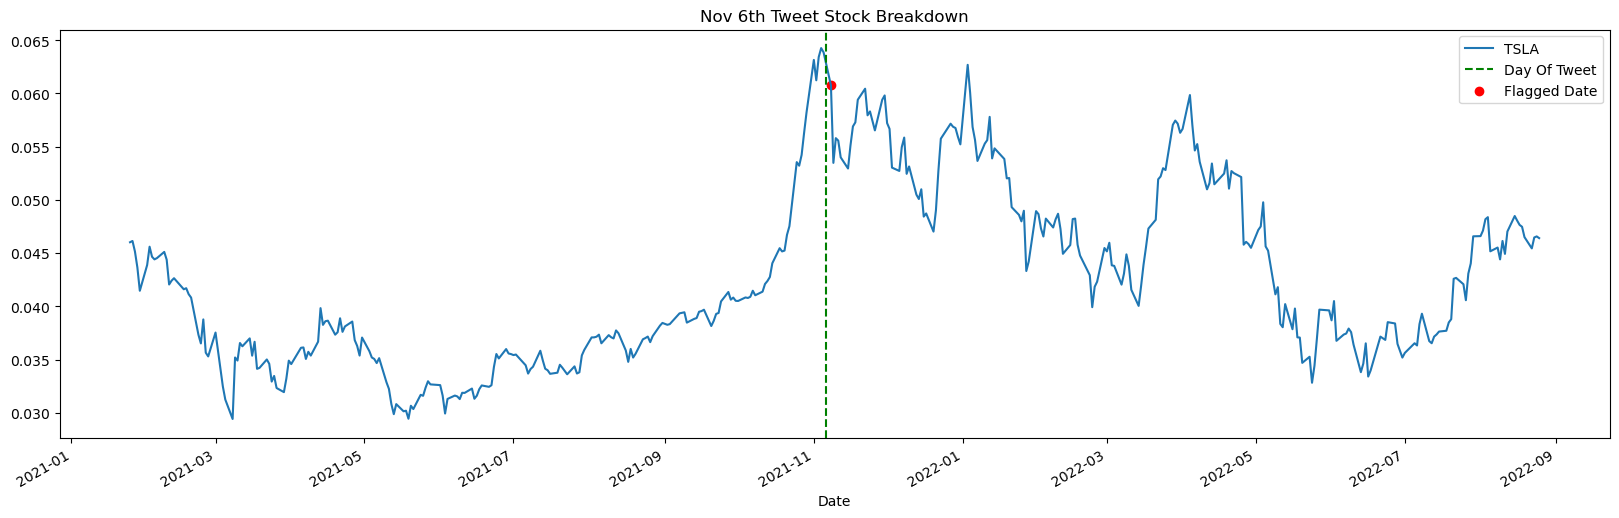

In [15]:
interesting_date =ranked_dates_only[15]

print(f"Flagged date is: {interesting_date}")
print(f"Tesla Percent Variance: {tesla.get_variance_data()[interesting_date] * 100}%")
print(f"Nasdaq Percent Variance: {nasdaq.get_variance_data()[interesting_date] * 100}%")
print(f"S&P 500 Percent Variance: {sp500.get_variance_data()[interesting_date] * 100}%")
print(f"DRIV Percent Variance: {ev_etf.get_variance_data()[interesting_date] * 100}%")




fig, axes = plt.subplots(1, 1, figsize=(20,6))

date_range =200
tesla_ranged = tesla.get_range_date(interesting_date,range_date=date_range, type="normalized")
tesla_ranged.plot(label=tesla.get_ticker())
plt.axvline(x="2021-11-06", linestyle='--',color="g", label="Day Of Tweet")

plt.scatter(x='2021-11-08',y=0.060765 , color="red", label="Flagged Date") 
plt.title("Nov 6th Tweet Stock Breakdown")
plt.legend()
plt.show()


From this visualizaton we can see that while Tesla's stocks dropped by almost 5% when the market re-opened on Monday, the overall market (S&P 500) and the EV etf stayed the same/increased, while Tesla decreased. While the Nasdaq also fell -0.14%, the fact that 2/3 of the control group did not react means that our filter methodology identified a date of interest which has a corresponding tweet from Musk where we could attribute as a cause for the dip.

However, we can also go one step further and use an Autoregressive Integrated Moving Averages Model to forecast what the stock prices should've been based on past data to prove the Elon Musk's tweet was a prime factor in the dip in value. 

Just for confirmation, we can use our `get_tweets_around` function to find the key tweet of interest and ensure that it took place on the correct day. A date range of 2 was used to ensure that tweets that took place outside of trading hours are also included.

In [24]:
NAME = "elonmusk"
tweets_list  = read_to_variable(NAME)
key_tweets = get_tweets_around(tweets_list,interesting_date,2)

for tweet in key_tweets:
    print(tweet)

['2021-11-09 15:32:04+00:00', 'Sometimes they’re a little 2-dimensional https://t.co/EQfkGG9Hzq', '53517', '1958']
['2021-11-09 08:13:40+00:00', 'I have all their albums https://t.co/OwQaSJADDE', '197823', '10255']
['2021-11-06 20:05:43+00:00', 'Roll them 🎲 🎲 https://t.co/F2rXGcz964', '46233', '3454']
['2021-11-06 19:30:34+00:00', '* abide(n)', '39936', '1655']
['2021-11-06 19:28:33+00:00', 'Note, I do not take a cash salary or bonus from anywhere. I only have stock, thus the only way for me to pay taxes personally is to sell stock.', '105174', '5117']
['2021-11-06 19:23:11+00:00', 'I will abide by the results of this poll, whichever way it goes', '86360', '3779']
['2021-11-06 19:17:49+00:00', 'Much is made lately of unrealized gains being a means of tax avoidance, so I propose selling 10% of my Tesla stock.\n\nDo you support this?', '142999', '23065']


As we can see, the last tweet found in the date range says that Elon proposed the idea of selling a large percentage of his stock. A proposal like this, no matter how serious, understandably worried investors and we can comfortably say that if any of the tweets in this range contributed to the large stock price decrease, it would have been this one. As the last column shows, this was Elon Musk's most retweeted tweet in this period, suggesting that it was spread the most across the platform. This higher virality than average is typical of tweets that are hypothesized to have a large impact on a global scale.

## Seasonal Auto Regressive Integrated Moving Averages Model (SARIMA)
A SARIMA model is a statistical analysis model which **allows us forecast future trends using past time series data.** Technically, it is based of the ARIMA model (Auto Regressive Integrated Moving Averages) except the SARIMA model takes into factor Seasonality. We will not be focusing on Exogenous variables (SARIMAX) in our model.

We can break down the SARIMA Model by its components:

1. **AR(p)**: A linear model where current values are a sum of past values multiplied by a numeric factor. `“p”` is the order (number) of time lags. The equation for this is:
$$\sum_{n=1}^{p}\alpha_n X_{t-n} $$
2. **I(d)**: To compensate for data which is non-stationary/has a trend, we need Integration or Differencing. `"d"` is the number of differencing required to make the time series stationary.

3. **MA(q)**: A moving average model and q is the number of lagged forecasting error terms in the prediction. `"q"` is the order (size) of the moving average window. The equation for this is:
$$\sum_{n=1}^{q}\theta_n \varepsilon_{t-n}$$

However, to take seasonality into account, we also need seasonal versions of p, d, and q, which we show through capitalization (P, D, and Q). The equations for `P` & `Q` are:

$$\sum_{n=1}^{P}\alpha_n X_{t-n} $$ 
$$\sum_{n=1}^{Q}\Theta_n \varepsilon_{t-n} $$

The complete SARIMA model format is `SARIMA(p,d,q)(P,D,Q,s)` where `s` accounts for the seasonality cycle. For example, s=12 means a monthly. 

The full equation form is:
$$ X_t = c + \sum_{n=1}^{p}\alpha_n X_{t-n} + \sum_{n=1}^{q}\theta_n \varepsilon_{t-n} + \sum_{n=1}^{P}\alpha_n X_{t-n} + \sum_{n=1}^{Q}\Theta_n \varepsilon_{t-n} +  \varepsilon_t$$


The mathematical proof is is well documented [here](https://real-statistics.com/time-series-analysis/seasonal-arima-sarima/sarima-models/).

Granted, full mathematical understanding is not necessary to using a SARIMA model as long as you understand the overall values of p,d,q and its seasonal counterparts, Python has a great library called `pmdarima` which performs everything you need to do for making a SARIMA model.

 Also, the SARIMA model is not perfect. It does not take into account variability when looking at the historical data to make it's forecasts. Furthermore, predicting stock behavior is always going to be problematic due to the highly complex nature of all the forces that play into affecting stock prices. However, for the scope of this project, the SARIMA model can give us a good sense as to the *trajectory* of what the stock behavior should have be based on historical data. 


### Creating te SARIMA Model

To create the SARIMA model, we need to choose our training and testing data. For our training data, we'll be using all of Tesla's raw stock data from the start of or range to the last day recorded before Elon Musk sent out that tweet on Saturday. Thus, the last day recorded would be Friday, Nov. 5th, 2021. Our test data will be any days after Nov 5th, 2021. However, for brevity, we'll only be looking 20 days after the tweet to compare the modelled behavior versus the actual stock behavior. 


In [9]:
#Separating Test & Train data
#Index 1976 is 2021-11-05
from sklearn.model_selection import train_test_split
#Train Data: We're selecting all the days before the dashed line for TSLA as train data.
#Test Data: Approximately a month after the dashed line (20 data points)
train, test = train_test_split(tesla.get_normalized_data(), train_size=1976, shuffle=False)


To built our SARIMA model, we can use a built in function of pmdarima called auto_arima. This will automatically find the best values for p, d, q, P, D, and Q by minimizing the AiC or the Akaike Information criteria. 

In [10]:
#Use the auto_arima function built into select the best p,m,d values
auto_model = pm.auto_arima(train, seasonal=True, m=12, D=1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)

#The number of days/data points we want to forecast into the future
predict_step =20
forecast = auto_model.predict(predict_step)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=-23734.361, Time=2.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-22930.914, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-23639.491, Time=0.59 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-23836.204, Time=1.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-22932.985, Time=0.76 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-23738.583, Time=1.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-23770.008, Time=2.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-23638.923, Time=0.59 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-23846.643, Time=2.33 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=-23856.442, Time=2.36 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-23727.667, Time=2.59 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=-23851.906, Time=2.74 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=-23855.498, Time=3.00 sec
 ARIMA(0,1,2)(2,1,2)[12]             : AIC=-23857.842, Time=

/home/sidkofi/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


We can now use the model that was built for us and predict 20 data points/dates into the future to compare with our test data. We can then visualize all this on a graph. 

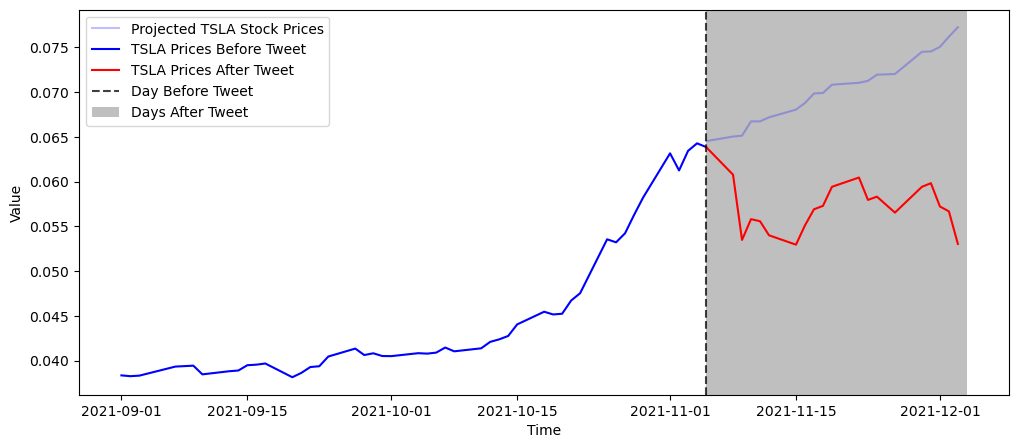

In [11]:
#Visualization


from datetime import datetime
date_object = datetime.strptime("2021-11-05", '%Y-%m-%d').date()
fig, axes = plt.subplots(1, 1, figsize=(12,5))
plt.plot(test.index[0:predict_step], forecast, c = 'b', alpha=0.25, label="Projected TSLA Stock Prices")
plt.plot(tesla.get_normalized_data()[1930:1977], c='b', label="TSLA Prices Before Tweet")
plt.plot(tesla.get_normalized_data()[1976:(1976+predict_step)], c="r", label="TSLA Prices After Tweet")
#Graphing Lines & Shaded Areas,
plt.axvline(x=date_object, linestyle='--',color="black", label="Day Before Tweet", alpha=0.75)
axes.axvspan(xmin=date_object,xmax=datetime(2021, 12, 4), facecolor='black', alpha=0.25, label="Days After Tweet")
# Set axis labels
plt.xticks(rotation=0)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


We can see from this graph that the SARIMA model projected the stocks to continue to go up based on the historical data, while in actuality the stocks took a sharp nosedive. 

In conclusion, through percent variance, we eliminated overall stock market movement to be the cause of Tesla's stock market going down on Nov. 8th, 2021. We then looked at twitter data and saw that Elon Musk made a Tesla stock related tweet on Saturday which could possibly affect the trajectory of Tesla's stock. We further validated that the tweet was a key factor in influencing the stock value, through our trained SARIMA model, which confirmed that the stocks were projected to have continued to increase based on historical data. The sharp dip was from an external factor that could strongly be inferred to be Elon Musk's tweet as that was the only thing that change from the 5th to the 8th. 

## Analyzing the tweets on the filtered dates
Now that we have validation that our filtered dates show events where the stock price dropped independently to the rest of the market, we can use the `show_tweets_around` function defined earlier to generate a list of all the tweets made around each of the filtered dates. We can then manually make insightful deductions as to whether the tweet content played a factor in the stock price decrease.

We will choose 5 random dates from the list of potential key dates to grab the tweets from and analyze the content of the tweets tweeted around them. By doing this we will effectively be able to assess whether the tweet was the key factor or not, by looking at the relevance of the content of the tweets around that time period.

### Date 1: July 16th, 2018
Below are all the tweets tweeted around this key date period.

In [25]:
DATE = "2018-07-16"
key_tweets_1 = get_tweets_around(tweets_list,DATE,2)

for tweet in key_tweets_1:
    print(tweet)

['2018-07-15 03:06:26+00:00', 'Reports that I am a top donor to GOP are categorically false. I am not a top donor to any political party.', '57344', '4996']
['2018-07-15 02:29:05+00:00', 'Thank you for fighting climate change. This affects every living creature on Earth. https://t.co/mm0cpaQLsn', '27319', '2283']
['2018-07-14 01:39:21+00:00', 'Feels like a show &amp; tell weekend. I wonder what the cat dragged in …', '20171', '898']


As we can see, Elon addressed a report of being a donor to the GOP on the 15th. Issues revolving around political donations have the potential to isolate groups of people as they disagree with policies made by a specific side. This natrually means that the stock of his most popular company is likely to be affected by such an allegation. The fact that this tweet was the most liked and retweeted by a significant margin compared to other his other tweets made around the time shows that it was shared around the platform a lot more. This is a well-known phenomenon on social media: posts that generate controversy and have a larger real-world impact are more likely to be shared with more people.

## Conclusion
In conclusion, we were able to fully answer our research question. Using statistical analysis and looking at the percentage variance of the stock prices of Tesla vs other tech indices, we were able to successfully create a list of events where the stock price of Tesla appeared to decrease independently of the rest of the stock market. In order to test our hypothesis that these drops were due to the tweets of Elon Musk, we first did an event study of one of our filtered dates, training and implementing a SARIMA model to create a projection of what the stock price of Tesla would have looked like, had the tweet event not taken place. This conformed to the initial hypothesis as it predicted that Tesla's stock price would have likely continued to increase, and his tweeting prevented that. We took the raw tweets and did a search for all the tweets in a two-day range of the large stock price drop and found a tweet where Elon proposed the idea of selling 10% of his stock, something that definitely would have an effect on the stock price of his company as investors panic and sell. This event study confirmed our method of filtering the stock data for key dates and meant that we could now focus on the second part of our question, which was whether the content of his tweets contributed to the drop.

We took the top five largest percentage decreases and searched for all tweets within 2 days of that date, and saw that in the majority of cases, there was a tweet that was either political or financial in nature. We also noticed that these tweets would receive higher interaction numbers on average than other tweets tweeted in that time period, suggesting that they had an increased virality rate on the platform. This further confirms our hypothesis that the content of Elon Musk's tweets affects the stock price of Tesla, and gives us a definitive answer to our original research question.

### Insights and key lessons
During this project, we made numerous key insights that affected the flow and direction of our project. One key insight made was that calling large volumes of data using APIs can be a very lengthy and computationally heavy process, but it is required to ensure that the quality of our analysis is as good as it can be. In our exploration, we needed to pull all the tweets that Elon Musk has ever made from his Twitter page. With over 23000 tweets, this took almost eight minutes in the python wrapper. Because of the way that the library calls elements from Twitter without a direct API call, the scraper generator object needed to be iterated every single time, and even if we tried to filter out tweets during the raw data gathering stage, the time taken would not have decreased. This insight taught us the lesson that scraping with libraries is not the most time-efficient method of gathering data.

Another lesson we learned over the course of this experiment is that the volatility of Twitter in recent times means that projects like this are very risky. With large changes going on at Twitter at the moment, the back-end structure is constantly changing, and this means that the libraries designed for scraping data from the site need to be actively updated. This is something we experienced in the early stages of the project, as we needed to reinstall snscrape to implement a change that addressed the compatibility of the Twitter API. If we did not choose a well-updated open-source library, completing this project would be much more challenging with all the unaccounted changes in other outdated libraries.

## Reflections, Ethics, and Next steps
When starting this project, we originally envisioned a much greater timescale and made plans to compare the tweets of other CEOs to the stock prices of their companies and make a general conclusion about whether all CEOs tweets affect the stocks of their company. However, over time we realized that the scope of our project was broad enough without this, and we did not have the time to do multiple event and case studies, due to the scale of data we chose to work with. This was a key difficulty for us. Having to manually explore a scraping library and learn about training SARIMA models meant that we had to designate a reasonable amount of to explain the methodology and conduct analysis, which would include filtering down a list of 23000 tweets to a list of around 5 or 6 for each case study.

With this considered having to eventually reduce the scope of our project was an inevitable decision. It allowed us to do a more in-depth analysis of Elon Musk and Tesla, where there were 50+ events with large percentage variances in closing stock prices between other stock indices and Tesla. We were able to address our difficulty by weighing up the positives of expanding the scope and reducing the analysis depth, compared to reducing the scope and increasing the analysis depth.

In terms of ethics, there was only one key concern we had going into this project. We were concerned that scraping data from someone's Twitter page might be considered an invasion of privacy and could be considered immoral from a data agency and privacy standpoint. We researched scraping public sites like Twitter for tweet data, and the ethics of using someone's quotes and phrases against them. The consensus with a project like this seems to be that scraping public-facing quotes and opinions from people on a site such as Twitter is not a morally or ethically void process, and as long as we don't make judgments about the character of the profile we are scraping, or make any baseless accusations, we are not being immoral or unethical. This is why we carefully designed our research question to avoid making any statements questioning intent. We simply scraped the data to try and see if there was any correlation between the instant of a tweet, its content, and the price of Tesla stocks, not whether it was an intentional elaborate scheme to manipulate the market.